In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#코랩에서 한글로 표현하기 위해 옵션 리셋
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#colab에서 사용하기 위해 폰트 다운
!apt-get install fonts-nanum*
!apt-get install fontconfig

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-e

In [ ]:
#라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
import matplotlib.colors as mcl
import matplotlib.patches as mpt
import openpyxl
import time
import re
import matplotlib.font_manager as fm
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from plotnine import *

#초기설정법

sns.set_context('talk')
sns.set_palette('Set2')
sns.set_style('whitegrid')
# alpha=를 통해 반투명화해 가시적으로 만들 수 았다 추가로

In [ ]:
#나눔바른고딕으로 폰트 설정
plt.rc('font', family='NanumBarunGothic')


In [ ]:
#데이터 불러오기
fast_df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/실습데이터.csv')
fast_df

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159323,1551424,PAYMENT,39658,204491,FASTCAMPUS,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,2022. 1. 1. 오전 12:01:08,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,1551410,PAYMENT,95136,206811,FASTCAMPUS,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,2022. 1. 1. 오전 12:01:12,-,385000,CARD,385000,-,385000,-
159325,1551361,PAYMENT,12764,202927,FASTCAMPUS,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,2022. 1. 1. 오전 12:01:21,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,1545070,PAYMENT,19606,208104,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,2022. 1. 2. 오전 11:01:24,-,289000,VBANK,289000,-,289000,-


# 데이터에 대한 이해

In [ ]:
#컬러명 확인
fast_df.columns

Index(['거래id', '유형', '고객id', '코스ID', '사이트', '포맷', '카테고리', '코스(상품) 이름', '거래일자',
       '쿠폰이름', '판매가격', '결제수단', '실거래금액', '쿠폰할인액', '거래금액', '환불금액'],
      dtype='object')

In [ ]:
#필요한 컬럼의 값들 가시화하기
column = ['유형','포맷','카테고리','쿠폰이름']
for i in column :
    print(i, fast_df[f'{i}'].unique())

유형 ['PAYMENT' 'REFUND']
포맷 ['올인원' 'RED']
카테고리 ['업무 생산성' '부동산/금융' '영상/3D' '프로그래밍' '마케팅' '일러스트' '디자인' '데이터 사이언스' '부업/창업'
 '투자/재테크' '크리에이티브']
쿠폰이름 ['-' '[WELCOME] 프로그래밍 3만원할인'
 '[20% 할인] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지 기수강자 대상' ...
 '[단체구매: 엠티오메가] 초격차 패키지 : 한 번에 끝내는 딥러닝/인공지능 무료수강권'
 '[무료수강권] 강의 참고용 발행_지인할인쿠폰' '[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰']


In [ ]:
#상위 5개 보기
fast_df.head(5)

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-


In [ ]:
## 데이터 분석
# 데이터의 모양 확인
print("Data Shape:", fast_df.shape)

Data Shape: (159328, 16)


In [ ]:
#데이터의 기본적인 정보 확인
fast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [ ]:
#기술통계
fast_df.describe()

,거래id,고객id,코스ID,실거래금액
count,1.593280e+05,159328.000000,159328.000000,1.593280e+05
mean,1.968703e+06,50061.549903,207679.355123,1.418337e+05
std,2.516892e+05,28850.738273,3541.408820,1.397796e+05
min,1.486194e+06,0.000000,2204.000000,-1.054400e+06
25%,1.743640e+06,25081.500000,204373.000000,7.800000e+04
50%,1.971748e+06,50082.500000,207161.000000,1.620000e+05
75%,2.188854e+06,75071.000000,210796.000000,2.176000e+05
max,2.417084e+06,99999.000000,214834.000000,1.339200e+06


In [ ]:
#데이터 결측치 확인
for i in fast_df.columns :
  missingValueRate = fast_df[i].isna().sum() / len(fast_df) * 100
  if missingValueRate >= 0 :
      print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

거래id null rate: 0.0%
유형 null rate: 0.0%
고객id null rate: 0.0%
코스ID null rate: 0.0%
사이트 null rate: 0.0%
포맷 null rate: 0.0%
카테고리 null rate: 0.0%
코스(상품) 이름 null rate: 0.0%
거래일자 null rate: 0.0%
쿠폰이름 null rate: 0.0%
판매가격 null rate: 0.0%
결제수단 null rate: 0.0%
실거래금액 null rate: 0.0%
쿠폰할인액 null rate: 0.0%
거래금액 null rate: 0.0%
환불금액 null rate: 0.0%


In [ ]:

#워드클라우드 준비
coupon_only_df = fast_df['쿠폰이름'].apply(lambda x: re.findall('\[(.*?)\]', x))
df_filtered = coupon_only_df[coupon_only_df.apply(lambda x: x != [])]
df_filtered = df_filtered.apply(lambda x: str(x))
array = df_filtered

text = ' '.join(array)

text = re.sub(r'\W+', ' ', text.lower())

words = text.split()

word_counts = Counter(words)

for word, count in word_counts.most_common():
    print(f"{word}: {count}")



# Counter 객체를 DataFrame으로 변환
coupon_dict_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()

# 열 이름 변경
coupon_dict_df.columns = ['Item', 'Count']
coupon_dict_df_sort = coupon_dict_df.sort_values('Count', ascending=False)

FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'


# 'Word'와 'Count' 열을 사전으로 변환
word_freq = dict(zip(coupon_dict_df_sort['Item'], coupon_dict_df_sort['Count']))

welcome: 26176
프로모션: 23302
쿠폰: 5029
할인쿠폰: 3960
증정: 3110
할인: 2730
20: 2392
4만원: 1862
무료수강권: 1759
5월: 1689
4월이니까: 1582
총: 1582
신규가입자는: 1572
더: 1572
프로그래밍: 825
크리스마스: 572
깜짝쿠폰: 572
네오아카데미: 538
데이터사이언스: 420
대상: 415
3만원: 379
자유이용권: 372
디자인: 361
시크릿쿠폰: 359
30: 352
3d: 348
내: 344
마음대로: 344
이용권: 344
시크릿: 335
한정: 316
50: 314
2만원: 313
vip: 303
000원: 301
금융: 273
72시간: 261
the: 261
red: 261
무료: 255
new22: 241
n잡스: 238
패키지: 216
타임특가: 213
전용: 209
강의: 201
끝내는: 199
한: 198
번에: 198
초격차: 193
업그레이드: 193
aws: 190
기반: 190
아키텍처: 190
설계와: 190
devops: 190
jan22: 188
만드는: 185
업무생산성: 179
영상: 177
40: 174
캐릭터를: 171
가장: 171
쉽게: 171
법: 171
아이패드: 171
모델링: 171
120: 159
sqld: 156
합격: 156
응원: 156
마케팅: 155
부동산: 155
5만원: 151
구독자: 143
수강생: 140
데이터: 131
15: 123
권오상의: 118
아카데미: 118
100: 116
기획전: 115
25: 111
10: 110
정가대비: 107
90: 107
공여사: 104
재발급: 97
팔로워: 94
트위터: 89
마스터클래스: 86
회원: 86
m: 85
a: 85
사례로: 85
배우는: 85
재무제표: 85
영향: 85
카페: 82
온라인: 79
유튜브: 77
럭키룰렛: 76
규정외: 72
제: 64
jan2022: 63
수강권: 61
편집하는여자의: 61
영상편집: 61
class: 60
편집녀

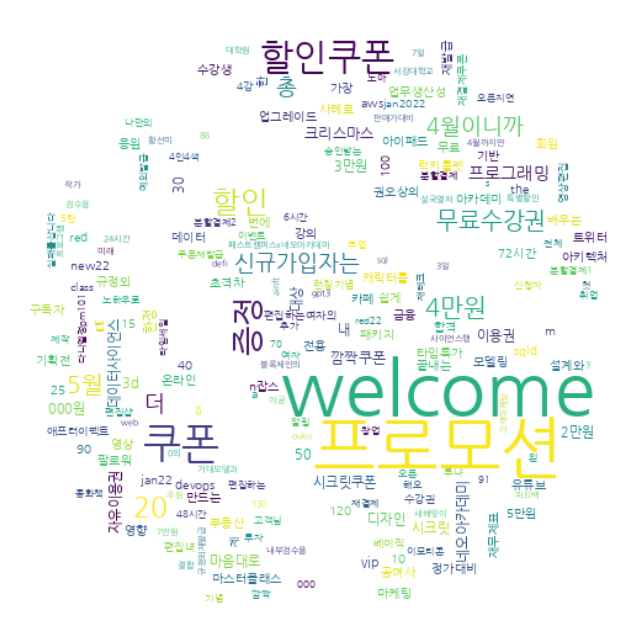

In [ ]:
#워드 클라우드 생성
img = Image.open('/content/drive/MyDrive/Colab Notebooks/data/500_500.jpg')
img_array = np.array(img)

wordcloud = WordCloud(width = 500, height = 500, font_path=FONT_PATH, random_state=21,max_font_size=120, mask=img_array, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# 데이터 전처리

In [ ]:
#필요없는 열 삭제
new_df = fast_df.drop(columns=["거래id", "코스ID", "사이트", "거래일자"])
new_df

,유형,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,PAYMENT,20053,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,-,189000,TRANSFER,159000,-,159000,-
1,PAYMENT,58309,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,-,501000,TRANSFER,501000,-,501000,-
2,PAYMENT,18075,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,-,549000,CARD,549000,-,549000,-
3,PAYMENT,41898,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,PAYMENT,94328,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...
159323,PAYMENT,39658,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,PAYMENT,95136,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,-,385000,CARD,385000,-,385000,-
159325,PAYMENT,12764,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,PAYMENT,19606,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,-,289000,VBANK,289000,-,289000,-


In [ ]:
#내부자 확인?
new_df[new_df["카테고리"] == "크리에이티브"] #내부검수용은 가설에 필요없어서 삭제해야한다. --> 필요 없는 열도 있다.

,유형,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
58774,PAYMENT,62879,올인원,크리에이티브,올인원 패키지 : 디자인 툴,[무료수강권] 내부직원 강의 검수용 발행,168700,PROMOTION,0,168700,0,-


In [ ]:
#행을 지우기위해 무료문자열을 csv로 저장 하고 일일이 확인함.
new_df[(new_df.쿠폰이름.str.contains("무료"))].to_csv("free.csv")

In [ ]:
new_df[(new_df.쿠폰이름.str.contains("발행"))].to_csv("발행.csv")

In [ ]:
new_df[(new_df.쿠폰이름.str.contains("제공"))].to_csv("제공.csv") #재공은 없다...ㅎㅎ

In [ ]:
#제거해야할 행들. -> 결론
new_df[(new_df.쿠폰이름.str.contains("참고|검수|내부|조교|인턴|test|미리보기|확인"))]

,유형,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
610,PAYMENT,72648,올인원,부동산/금융,올인원 패키지 : 권오상의 금융 아카데미 - 내부회계관리제도 (수강시간 제한),[무료수강권] 강의 참고용 발행_강사님,345000,PROMOTION,0,345000,0,-
645,PAYMENT,20190,RED,데이터 사이언스,THE RED : Area Chair 이광무 교수의 Neural Fields & 3...,[무료수강권] 강의 참고용 발행_강사님,380000,PROMOTION,0,380000,0,-
654,PAYMENT,11854,올인원,부동산/금융,올인원 패키지 : 권오상의 금융 아카데미 - M&A 사례로 배우는 재무제표 영향 (...,[무료수강권] 강의 참고용 발행_강사님,339000,PROMOTION,0,339000,0,-
856,PAYMENT,14565,RED,마케팅,THE RED : 광고인 박웅현과 크리에이티브,[CX] 검수용 쿠폰_레드,192000,PROMOTION,0,192000,0,-
858,PAYMENT,5416,RED,마케팅,The RED : 나 자신과 여행하는 에세이 창작법 by. 이병률,[CX] 검수용 쿠폰_레드,158000,PROMOTION,0,158000,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...
157850,PAYMENT,15732,올인원,영상/3D,애프터 이펙트 하나로 디자이너처럼 만드는 모션그래픽,[무료수강권] 강의참고용 발행_CX팀,165000,PROMOTION,0,165000,0,-
158050,PAYMENT,71868,올인원,디자인,초격차 패키지 : 100개의 클론디자인으로 배우는 UX/UI,[검수용] CX 검수용 쿠폰,203000,PROMOTION,0,203000,0,-
158187,PAYMENT,25851,올인원,디자인,초격차 패키지 : 100개의 클론디자인으로 배우는 UX/UI,[무료수강권] 강의 참고용 발행_강사님,203000,PROMOTION,0,203000,0,-
159170,PAYMENT,97255,올인원,프로그래밍,올인원 패키지 : 최성일의 코딩 초급자를 위한 웹 모션 디자인,[무료수강권] 강의 참고용 발행_지인할인쿠폰,196000,PROMOTION,0,196000,0,-


In [ ]:
new_df.drop(new_df[(new_df.쿠폰이름.str.contains("참고|검수|내부|조교|인턴|test|미리보기|확인"))].index, inplace=True)
new_df #1575행들 삭제

,유형,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,PAYMENT,20053,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,-,189000,TRANSFER,159000,-,159000,-
1,PAYMENT,58309,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,-,501000,TRANSFER,501000,-,501000,-
2,PAYMENT,18075,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,-,549000,CARD,549000,-,549000,-
3,PAYMENT,41898,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,PAYMENT,94328,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",-,239000,CARD,239000,-,239000,-
...,...,...,...,...,...,...,...,...,...,...,...,...
159323,PAYMENT,39658,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,-
159324,PAYMENT,95136,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,-,385000,CARD,385000,-,385000,-
159325,PAYMENT,12764,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,-
159326,PAYMENT,19606,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,-,289000,VBANK,289000,-,289000,-


In [ ]:
#데이터 결측치 확인
new_df = new_df.replace("-", None)
new_df

,유형,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,PAYMENT,20053,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,None,189000,TRANSFER,159000,None,159000,None
1,PAYMENT,58309,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,None,501000,TRANSFER,501000,None,501000,None
2,PAYMENT,18075,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,None,549000,CARD,549000,None,549000,None
3,PAYMENT,41898,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,None
4,PAYMENT,94328,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",None,239000,CARD,239000,None,239000,None
...,...,...,...,...,...,...,...,...,...,...,...,...
159323,PAYMENT,39658,올인원,부업/창업,올인원 패키지 : 제 2의 월급을 만들어주는 직장인 스몰비즈니스 가이드,[NEW22] 온라인 강의 1만원 즉시 추가 할인 쿠폰,217000,CARD,207000,10000,207000,None
159324,PAYMENT,95136,올인원,영상/3D,[Kit] 닷밀의 미디어아트 그래픽 클래스 : 모션그래픽 뉴패러다임 Creative...,None,385000,CARD,385000,None,385000,None
159325,PAYMENT,12764,올인원,데이터 사이언스,올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP,[WELCOME] 패캠은 처음이지? 3만원 할인쿠폰,166000,CARD,136000,30000,136000,None
159326,PAYMENT,19606,올인원,업무 생산성,올인원 패키지 : 100억을 움직이는 50가지 PPT 디자인 원칙,None,289000,VBANK,289000,None,289000,None


In [ ]:
new_df.isna().sum()

유형                0
고객id              0
포맷                0
카테고리              0
코스(상품) 이름         0
쿠폰이름          82946
판매가격             59
결제수단              0
실거래금액             0
쿠폰할인액         82946
거래금액          11318
환불금액         146435
dtype: int64

In [ ]:
for i in new_df.columns :
    missingValueRate = new_df[i].isna().sum() / len(new_df) * 100
    if missingValueRate > 0 :
        print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

쿠폰이름 null rate: 52.58%
판매가격 null rate: 0.04%
쿠폰할인액 null rate: 52.58%
거래금액 null rate: 7.17%
환불금액 null rate: 92.83%


In [ ]:
# 데이터의 모양 확인
print("Data Shape:", new_df.shape)

Data Shape: (157753, 12)


In [ ]:
#데이터 결측치 처리
new_df['쿠폰이름'].fillna('No Data', inplace  = True)

cols = ['판매가격','쿠폰할인액','거래금액','환불금액']

for i in cols:
    new_df[i].fillna(0, inplace  = True)

In [ ]:
#결측치 재확인
for i in new_df.columns :
    missingValueRate = new_df[i].isna().sum() / len(new_df) * 100
    if missingValueRate >= 0 :
        print("{} null rate: {}%".format(i,round(missingValueRate, 2)))

유형 null rate: 0.0%
고객id null rate: 0.0%
포맷 null rate: 0.0%
카테고리 null rate: 0.0%
코스(상품) 이름 null rate: 0.0%
쿠폰이름 null rate: 0.0%
판매가격 null rate: 0.0%
결제수단 null rate: 0.0%
실거래금액 null rate: 0.0%
쿠폰할인액 null rate: 0.0%
거래금액 null rate: 0.0%
환불금액 null rate: 0.0%


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157753 entries, 0 to 159327
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   유형         157753 non-null  object
 1   고객id       157753 non-null  int64 
 2   포맷         157753 non-null  object
 3   카테고리       157753 non-null  object
 4   코스(상품) 이름  157753 non-null  object
 5   쿠폰이름       157753 non-null  object
 6   판매가격       157753 non-null  object
 7   결제수단       157753 non-null  object
 8   실거래금액      157753 non-null  int64 
 9   쿠폰할인액      157753 non-null  object
 10  거래금액       157753 non-null  object
 11  환불금액       157753 non-null  object
dtypes: int64(2), object(10)
memory usage: 15.6+ MB


In [ ]:
# numeric 한 타입으로 변경하는 코드
final_df = new_df.copy()
columns_name = ['판매가격','실거래금액','쿠폰할인액','거래금액','환불금액']
for name in columns_name:
    final_df[name] = pd.to_numeric(new_df[f'{name}'], errors='coerce')
#2번실행해야 타입바뀌네요

In [ ]:
#최종점검
final_df.head()

,유형,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,PAYMENT,20053,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,No Data,189000,TRANSFER,159000,0,159000,0
1,PAYMENT,58309,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,No Data,501000,TRANSFER,501000,0,501000,0
2,PAYMENT,18075,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,No Data,549000,CARD,549000,0,549000,0
3,PAYMENT,41898,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,0
4,PAYMENT,94328,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",No Data,239000,CARD,239000,0,239000,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157753 entries, 0 to 159327
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   유형         157753 non-null  object
 1   고객id       157753 non-null  int64 
 2   포맷         157753 non-null  object
 3   카테고리       157753 non-null  object
 4   코스(상품) 이름  157753 non-null  object
 5   쿠폰이름       157753 non-null  object
 6   판매가격       157753 non-null  int64 
 7   결제수단       157753 non-null  object
 8   실거래금액      157753 non-null  int64 
 9   쿠폰할인액      157753 non-null  int64 
 10  거래금액       157753 non-null  int64 
 11  환불금액       157753 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 15.6+ MB


# 시각화

## 목적
- 데이터를 가지고 하고자하는 목적 : 1) 구매내역분석 2) 수익창출 인사이트
- feature engineering : 기존에 존재하는 변수에 활용하여 정보를 추가 & 생성 과정

In [ ]:
#유형을 기준으로 그룹화 & 단순 개수를 확인하기 위해
type_groupby_df = final_df.groupby("유형").count()
type_groupby_df

,고객id,포맷,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
유형,,,,,,,,,,,
PAYMENT,146435,146435,146435,146435,146435,146435,146435,146435,146435,146435,146435
REFUND,11318,11318,11318,11318,11318,11318,11318,11318,11318,11318,11318


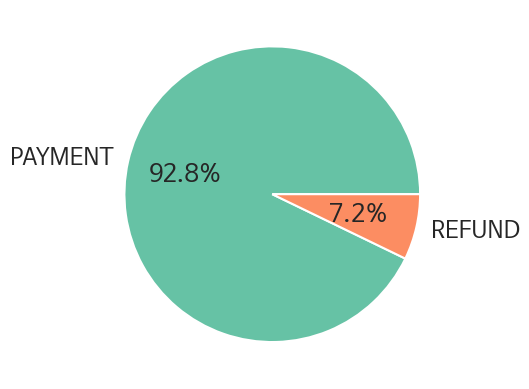

In [ ]:
#거래 유형 확인
plt.pie(x= type_groupby_df["고객id"],labels = type_groupby_df.index, autopct='%.1f%%')
plt.show()

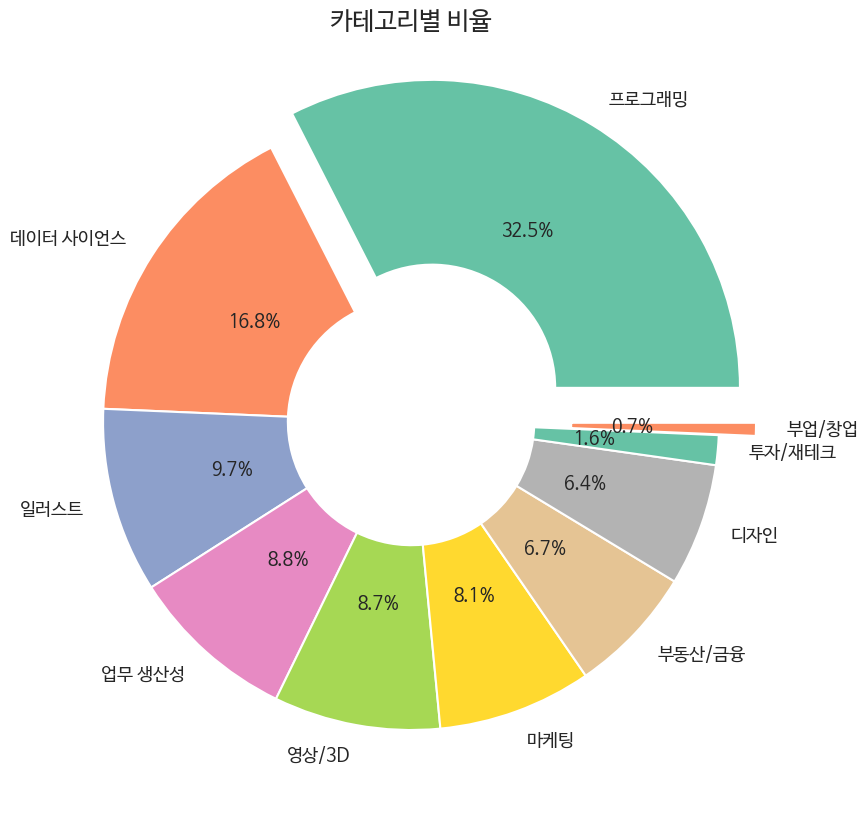

In [ ]:
#카테고리 비율 확인
category_counts = final_df['카테고리'].value_counts()
category_rates = category_counts / len(final_df) * 100
category_rates = category_rates.round(3)
explode = [0.13, 0, 0, 0, 0, 0, 0, 0, 0, 0.12]

plt.figure(figsize=(10, 10))
plt.pie(category_rates, labels=category_rates.index, autopct='%1.1f%%', textprops={'fontsize': 13},
        wedgeprops={'width': 0.6, 'edgecolor': 'white'}, explode=explode)
plt.title('카테고리별 비율')
plt.show()

### 구매확정률 PAYMENT = 구매확정으로 가설

In [ ]:
#완강테이블 만들기
payment_groupby_df = final_df[final_df['유형'] == "PAYMENT"]
payment_groupby_df = payment_groupby_df.groupby("카테고리").count()
payment_groupby_df

,유형,고객id,포맷,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,판매가격 범위,쿠폰할인액 범위
카테고리,,,,,,,,,,,,,
데이터 사이언스,24526,24526,24526,24526,24526,24526,24526,24526,24526,24526,24526,24526,24526
디자인,9311,9311,9311,9311,9311,9311,9311,9311,9311,9311,9311,9311,9311
마케팅,11873,11873,11873,11873,11873,11873,11873,11873,11873,11873,11873,11873,11873
부동산/금융,9979,9979,9979,9979,9979,9979,9979,9979,9979,9979,9979,9979,9979
부업/창업,997,997,997,997,997,997,997,997,997,997,997,997,997
업무 생산성,12943,12943,12943,12943,12943,12943,12943,12943,12943,12943,12943,12943,12943
영상/3D,12851,12851,12851,12851,12851,12851,12851,12851,12851,12851,12851,12851,12851
일러스트,14127,14127,14127,14127,14127,14127,14127,14127,14127,14127,14127,14127,14127
투자/재테크,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329


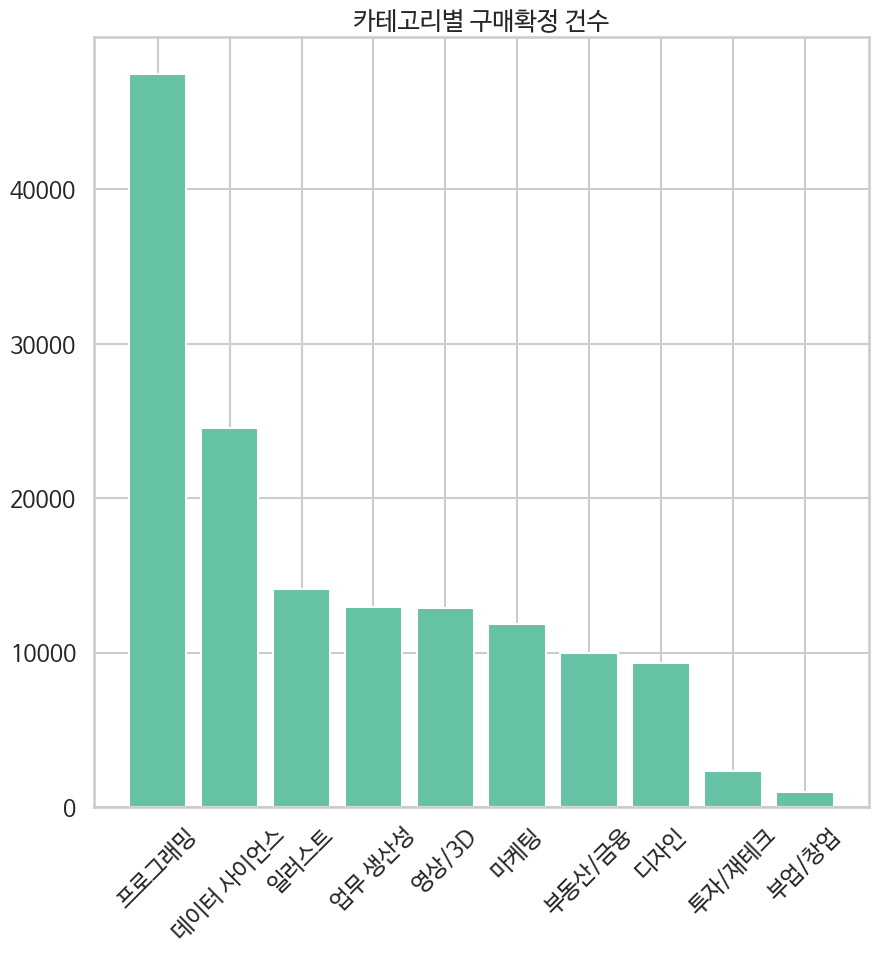

In [ ]:
#카테고리별 완강 건수 확인
x = payment_groupby_df.sort_values(by="실거래금액",ascending=False).index
y = payment_groupby_df['실거래금액'].sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('카테고리별 구매확정 건수')
plt.show()

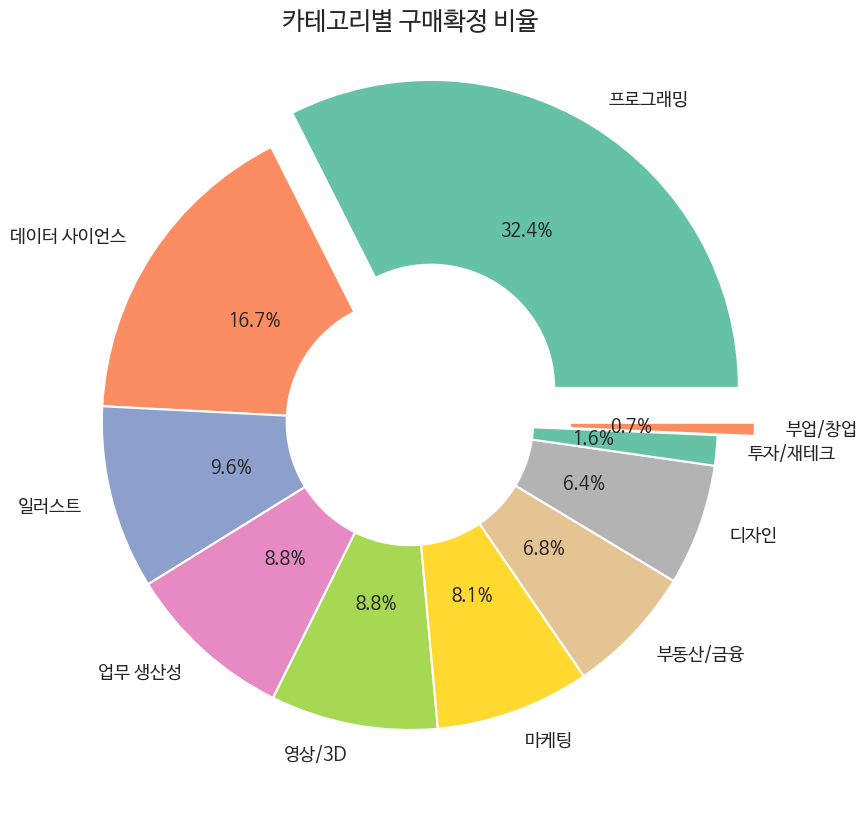

In [ ]:
#다시 파이차트로 최종 표현
explode = [0.13, 0, 0, 0, 0, 0, 0, 0, 0, 0.12]

plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'fontsize': 13},
        wedgeprops={'width': 0.6, 'edgecolor': 'white'}, explode=explode)
plt.title('카테고리별 구매확정 비율')
plt.show()

### 환불비율 알아보기

In [ ]:
#완강테이블 만들기
refund_groupby_df = final_df[final_df['유형'] == "REFUND"]
refund_groupby_df = refund_groupby_df.groupby("카테고리").count()
refund_groupby_df

,유형,고객id,포맷,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액,판매가격 범위,쿠폰할인액 범위
카테고리,,,,,,,,,,,,,
데이터 사이언스,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992,1992
디자인,815,815,815,815,815,815,815,815,815,815,815,815,815
마케팅,873,873,873,873,873,873,873,873,873,873,873,873,873
부동산/금융,654,654,654,654,654,654,654,654,654,654,654,654,654
부업/창업,76,76,76,76,76,76,76,76,76,76,76,76,76
업무 생산성,864,864,864,864,864,864,864,864,864,864,864,864,864
영상/3D,942,942,942,942,942,942,942,942,942,942,942,942,942
일러스트,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
투자/재테크,135,135,135,135,135,135,135,135,135,135,135,135,135


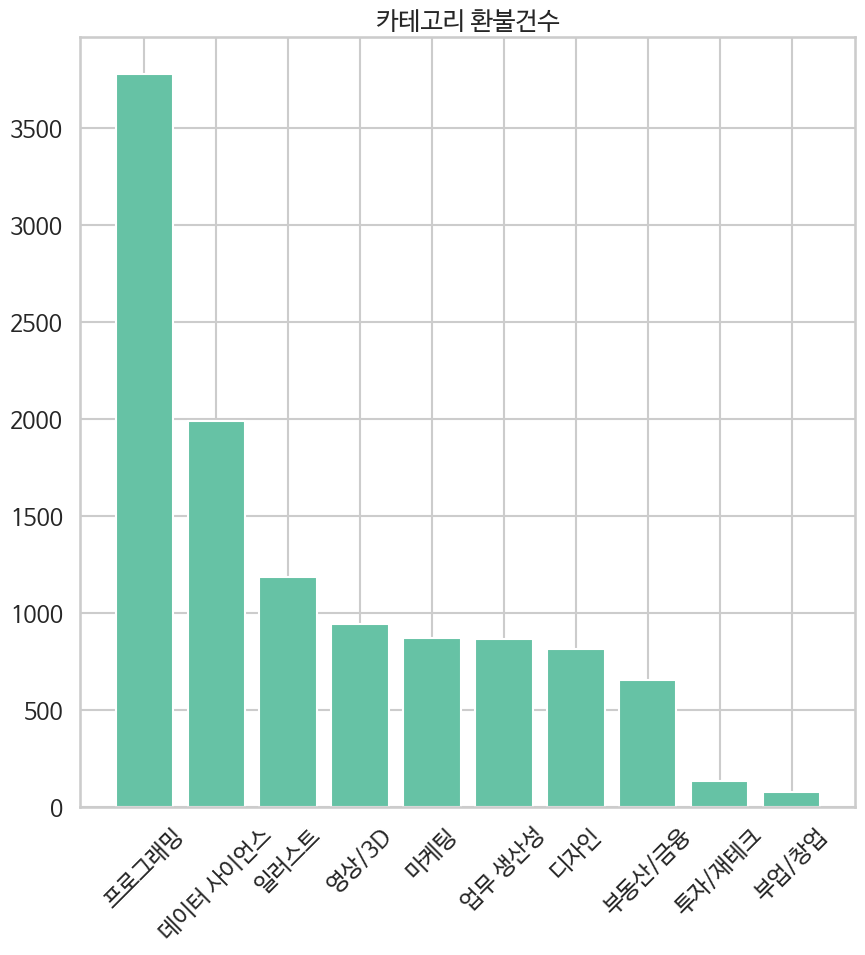

In [ ]:
#카테고리 환불건수
x = refund_groupby_df.sort_values(by="실거래금액",ascending=False).index
y = refund_groupby_df['환불금액'].sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('카테고리 환불건수')
plt.show()

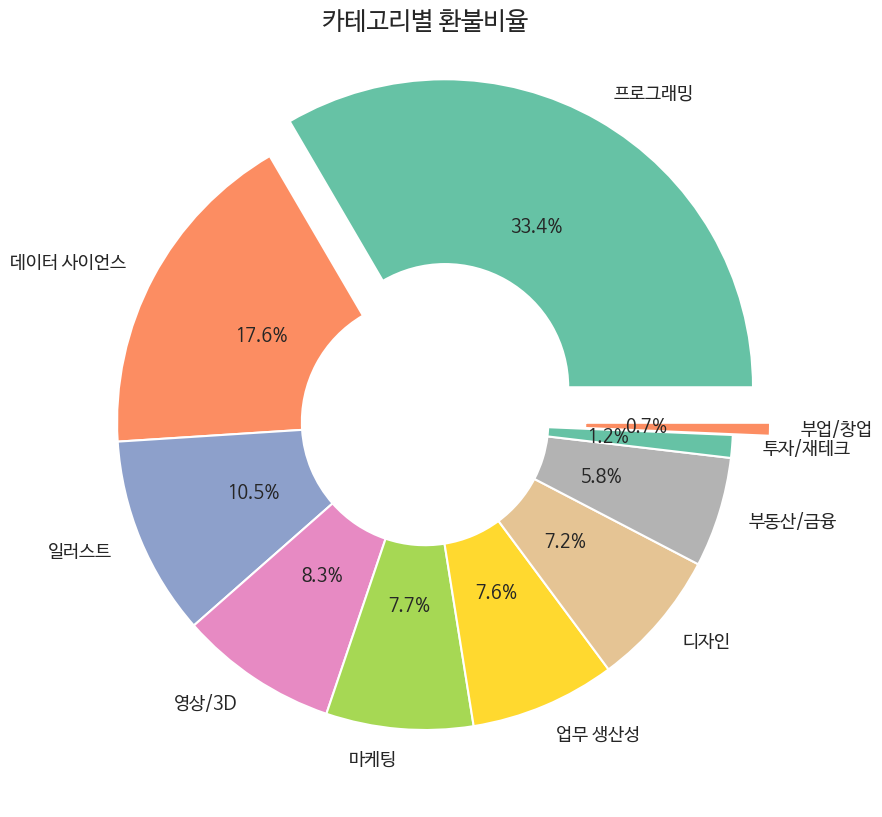

In [ ]:
#원형 그래프으로 최종 표현
explode = [0.13, 0, 0, 0, 0, 0, 0, 0, 0, 0.12]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'fontsize': 13},
        wedgeprops={'width': 0.6, 'edgecolor': 'white'}, explode=explode)
plt.title('카테고리별 환불비율')
plt.show()

### 구매확정/환불 비교하기

In [ ]:
#구매확정/환불 비교 데이터 프레임 생성
groupby_df = final_df.groupby(["카테고리","유형"]).count()
groupby_df

고객id     포맷  코스(상품) 이름   쿠폰이름   판매가격   결제수단  실거래금액  쿠폰할인액  \
카테고리     유형                                                                    
데이터 사이언스 PAYMENT  24526  24526      24526  24526  24526  24526  24526  24526   
         REFUND    1992   1992       1992   1992   1992   1992   1992   1992   
디자인      PAYMENT   9311   9311       9311   9311   9311   9311   9311   9311   
         REFUND     815    815        815    815    815    815    815    815   
마케팅      PAYMENT  11873  11873      11873  11873  11873  11873  11873  11873   
         REFUND     873    873        873    873    873    873    873    873   
부동산/금융   PAYMENT   9979   9979       9979   9979   9979   9979   9979   9979   
         REFUND     654    654        654    654    654    654    654    654   
부업/창업    PAYMENT    997    997        997    997    997    997    997    997   
         REFUND      76     76         76     76     76     76     76     76   
업무 생산성   PAYMENT  12943  12943      12943  12943  12943  12943  12943  12943   
         REFUND     864    864        864    864    864    864    864    864   
영상/3D    PAYMENT  12851  12851      12851  12851  12851  12851  12851  12851   
         REFUND     942    942        942    942    942    942    942    942   
일러스트     PAYMENT  14127  14127      14127  14127  14127  14127  14127  14127   
         REFUND    1185   1185       1185   1185   1185   1185   1185   1185   
투자/재테크   PAYMENT   2329   2329       2329   2329   2329   2329   2329   2329   
         REFUND     135    135        135    135    135    135    135    135   
프로그래밍    PAYMENT  47499  47499      47499  47499  47499  47499  47499  47499   
         REFUND    3782   3782       3782   3782   3782   3782   3782   3782   

                   거래금액   환불금액  
카테고리     유형                     
데이터 사이언스 PAYMENT  24526  24526  
         REFUND    1992   1992  
디자인      PAYMENT   9311   9311  
         REFUND     815    815  
마케팅      PAYMENT  11873  11873  
         REFUND     873    873  
부동산/금융   PAYMENT   9979   9979  
         REFUND     654    654  
부업/창업    PAYMENT    997    997  
         REFUND      76     76  
업무 생산성   PAYMENT  12943  12943  
         REFUND     864    864  
영상/3D    PAYMENT  12851  12851  
         REFUND     942    942  
일러스트     PAYMENT  14127  14127  
         REFUND    1185   1185  
투자/재테크   PAYMENT   2329   2329  
         REFUND     135    135  
프로그래밍    PAYMENT  47499  47499  
         REFUND    3782   3782

In [ ]:
#더블 도넛 파이에 쓰기 위해 인덱스 '재정렬'
new_index = ['프로그래밍', '데이터 사이언스', '일러스트', '업무 생산성', '영상/3D', '마케팅', '부동산/금융', '디자인', '투자/재테크', '부업/창업']
groupby_df = groupby_df.reindex(new_index, level=0)
groupby_df

고객id     포맷  코스(상품) 이름   쿠폰이름   판매가격   결제수단  실거래금액  쿠폰할인액  \
카테고리     유형                                                                    
프로그래밍    PAYMENT  47499  47499      47499  47499  47499  47499  47499  47499   
         REFUND    3782   3782       3782   3782   3782   3782   3782   3782   
데이터 사이언스 PAYMENT  24526  24526      24526  24526  24526  24526  24526  24526   
         REFUND    1992   1992       1992   1992   1992   1992   1992   1992   
일러스트     PAYMENT  14127  14127      14127  14127  14127  14127  14127  14127   
         REFUND    1185   1185       1185   1185   1185   1185   1185   1185   
업무 생산성   PAYMENT  12943  12943      12943  12943  12943  12943  12943  12943   
         REFUND     864    864        864    864    864    864    864    864   
영상/3D    PAYMENT  12851  12851      12851  12851  12851  12851  12851  12851   
         REFUND     942    942        942    942    942    942    942    942   
마케팅      PAYMENT  11873  11873      11873  11873  11873  11873  11873  11873   
         REFUND     873    873        873    873    873    873    873    873   
부동산/금융   PAYMENT   9979   9979       9979   9979   9979   9979   9979   9979   
         REFUND     654    654        654    654    654    654    654    654   
디자인      PAYMENT   9311   9311       9311   9311   9311   9311   9311   9311   
         REFUND     815    815        815    815    815    815    815    815   
투자/재테크   PAYMENT   2329   2329       2329   2329   2329   2329   2329   2329   
         REFUND     135    135        135    135    135    135    135    135   
부업/창업    PAYMENT    997    997        997    997    997    997    997    997   
         REFUND      76     76         76     76     76     76     76     76   

                   거래금액   환불금액  
카테고리     유형                     
프로그래밍    PAYMENT  47499  47499  
         REFUND    3782   3782  
데이터 사이언스 PAYMENT  24526  24526  
         REFUND    1992   1992  
일러스트     PAYMENT  14127  14127  
         REFUND    1185   1185  
업무 생산성   PAYMENT  12943  12943  
         REFUND     864    864  
영상/3D    PAYMENT  12851  12851  
         REFUND     942    942  
마케팅      PAYMENT  11873  11873  
         REFUND     873    873  
부동산/금융   PAYMENT   9979   9979  
         REFUND     654    654  
디자인      PAYMENT   9311   9311  
         REFUND     815    815  
투자/재테크   PAYMENT   2329   2329  
         REFUND     135    135  
부업/창업    PAYMENT    997    997  
         REFUND      76     76

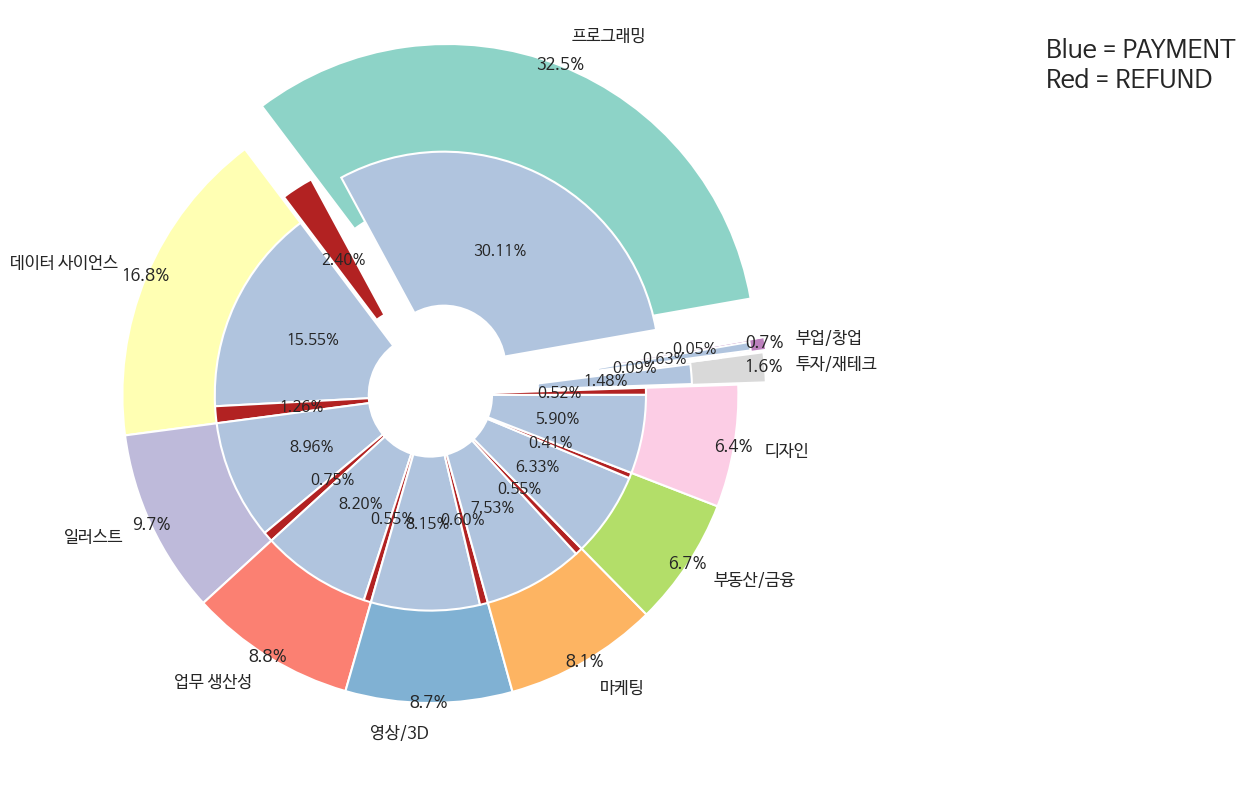

In [ ]:
#더블 도넛 파이
plt.figure(figsize=(10, 10))
#전체 강의 비율
ratio = final_df['카테고리'].value_counts().sort_values(ascending = False).values.flatten()
label = final_df['카테고리'].value_counts().sort_values(ascending = False).index
colors = plt.cm.Set3(range(len(label)))
colors_inner = ['lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick',
                'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick']

explode = [0.15, 0, 0, 0, 0, 0, 0, 0, 0.09, 0.1]
explode2 = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0.15, 0.25, 0.35, 0.45]
#explode=explode


plt.pie(ratio, labels= label, colors=colors, startangle=10,frame=True,radius=1,autopct='%1.1f%%',
        pctdistance=1.,textprops={'fontsize': 12},labeldistance=1.1,
        wedgeprops={'width': 0.5, 'edgecolor': 'white'},explode=explode)

#유형의 비율 (완강 / 환불)
plt.pie(groupby_df['실거래금액'].values.flatten() ,colors=colors_inner,autopct='%1.2f%%',
        startangle=10, radius=.7, textprops={'fontsize': 11},labeldistance=10,
        wedgeprops={'width': 0.5, 'edgecolor': 'white'},explode=explode2) #width :파이크기 변경, explode 특정 파이조각을 띄우는 함수.

centre_circle = plt.Circle((0,0),.2,color='black', fc='white',linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(2, 1, "Blue = PAYMENT \nRed = REFUND ", bbox=dict(facecolor='white', alpha=0.5))
plt.show()

### 상관계수

In [ ]:
final_corr = final_df.corr(numeric_only=True).round(2)
final_corr

,고객id,판매가격,실거래금액,쿠폰할인액,거래금액,환불금액
고객id,1.0,0.00,-0.00,0.00,-0.00,-0.00
판매가격,0.0,1.00,0.40,0.08,0.58,-0.12
실거래금액,-0.0,0.40,1.00,-0.35,0.93,0.69
쿠폰할인액,0.0,0.08,-0.35,1.00,-0.53,0.15
거래금액,-0.0,0.58,0.93,-0.53,1.00,0.37
환불금액,-0.0,-0.12,0.69,0.15,0.37,1.00


<ipython-input-54-f9d369a10682>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.


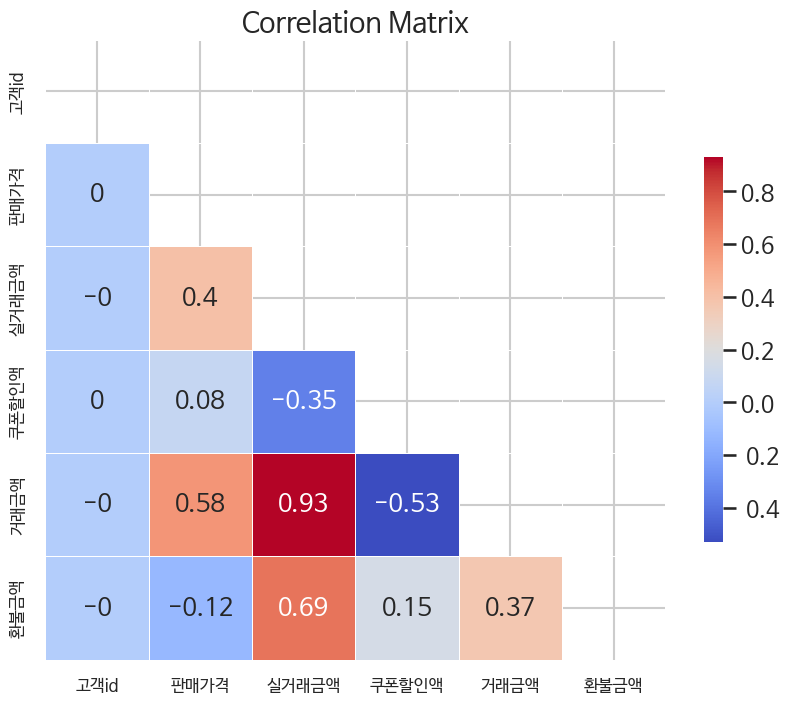

In [ ]:
#상관계수 히트맵
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(final_corr, dtype=np.bool)) #Boolean Masking
sns.heatmap(final_df.corr(numeric_only=True).round(2),annot=True, linewidths=.5, square=True, cbar_kws={"shrink": .5},cmap='coolwarm',mask = mask);
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 강의 formatt에 대해서 생각

In [ ]:
#포맷 분석 -> 객체 생성
formatt_groupby_df = final_df.groupby("포맷").count()
formatt_groupby_df

,유형,고객id,카테고리,코스(상품) 이름,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
포맷,,,,,,,,,,,
RED,12152,12152,12152,12152,12152,12152,12152,12152,12152,12152,12152
올인원,145601,145601,145601,145601,145601,145601,145601,145601,145601,145601,145601


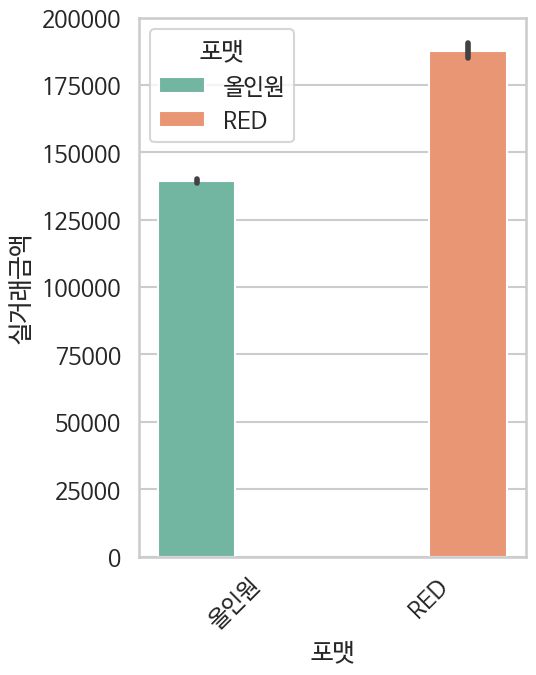

In [ ]:
#환불
plt.figure(figsize=(5, 7))
sns.barplot(x="포맷", y="실거래금액", hue="포맷", data=final_df)
plt.xticks(rotation=45)
plt.show()

##단과 더 금액이 많다.

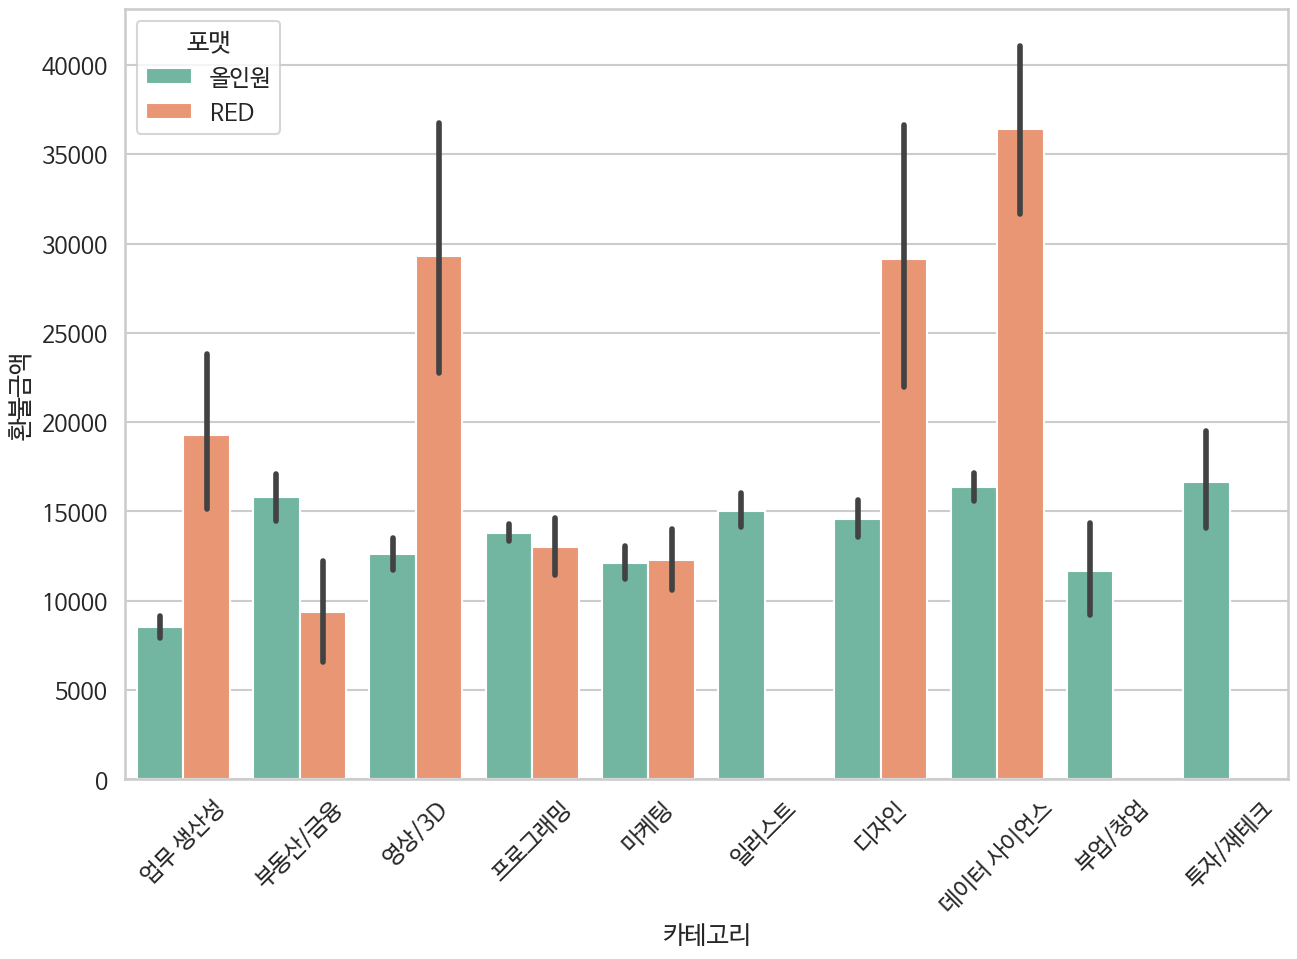

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x=final_df["카테고리"], y=final_df["환불금액"].abs(), hue=final_df["포맷"])
plt.xticks(rotation=45)
plt.show()
##단과에 환불이 더 금액이 많다.

In [ ]:
#완강/환불비교할 데이터 프레임 생성
type_df = final_df.groupby(["포맷","유형"]).count()
type_df

고객id    카테고리  코스(상품) 이름    쿠폰이름    판매가격    결제수단   실거래금액  \
포맷  유형                                                                   
RED PAYMENT   11186   11186      11186   11186   11186   11186   11186   
    REFUND      966     966        966     966     966     966     966   
올인원 PAYMENT  135249  135249     135249  135249  135249  135249  135249   
    REFUND    10352   10352      10352   10352   10352   10352   10352   

              쿠폰할인액    거래금액    환불금액  
포맷  유형                               
RED PAYMENT   11186   11186   11186  
    REFUND      966     966     966  
올인원 PAYMENT  135249  135249  135249  
    REFUND    10352   10352   10352

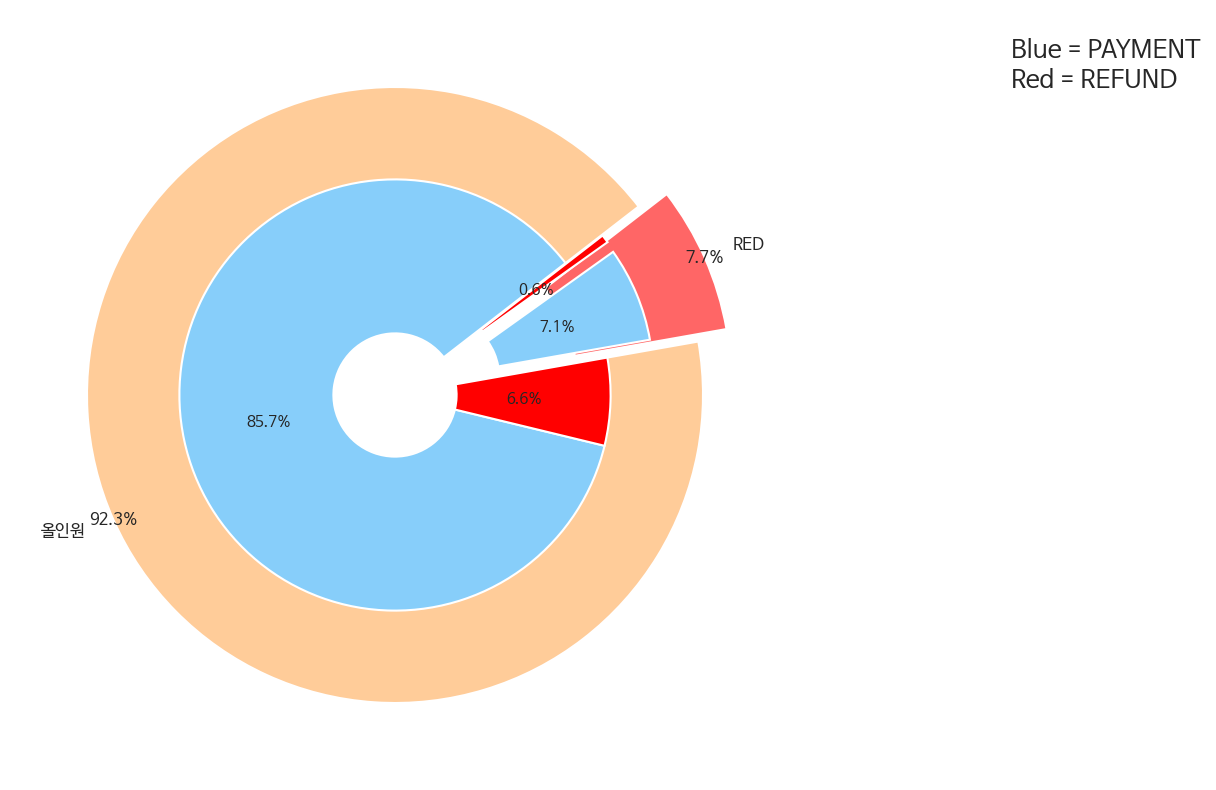

In [ ]:
#단과 유형 더블 도넛차트

#더블 도넛 파이
plt.figure(figsize=(10, 10))
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_inner = ['lightskyblue', 'r', 'lightskyblue', 'r', 'lightskyblue', 'r', 'lightskyblue', 'r', 'lightskyblue', 'r',
                'lightskyblue', 'r', 'lightskyblue', 'r', 'lightskyblue', 'r', 'lightskyblue', 'r', 'lightskyblue', 'r']

explode = [0.1,0]
explode2 = [0.15,0.15,0,0]

#포맷 비율
ratio = final_df['포맷'].value_counts().sort_values().values.flatten()
label = final_df['포맷'].value_counts().sort_values().index
plt.pie(ratio, labels= label, colors=colors, startangle=10,frame=True,radius=1,autopct='%1.1f%%',
        pctdistance=1.,textprops={'fontsize': 12},labeldistance=1.1,
        wedgeprops={'width': 0.5, 'edgecolor': 'white'},explode = explode)

#유형의 비율 (완강 / 환불)
plt.pie(type_df['실거래금액'].values.flatten() ,colors=colors_inner,autopct='%1.1f%%',
        startangle=10, radius=.7, textprops={'fontsize': 11},labeldistance=10,
        wedgeprops={'width': 0.5, 'edgecolor': 'white'},explode = explode2)#width :파이크기 변경, explode 특정 파이조각을 띄우는 함수.

centre_circle = plt.Circle((0,0),.2,color='black', fc='white',linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(2, 1, "Blue = PAYMENT \nRed = REFUND ", bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [ ]:
#완강/환불비교할 데이터 프레임 생성 ->객체 생성
type_df2 = final_df.groupby(["카테고리","포맷"]).count()
type_df2

유형   고객id  코스(상품) 이름   쿠폰이름   판매가격   결제수단  실거래금액  쿠폰할인액  \
카테고리     포맷                                                                
데이터 사이언스 RED   2493   2493       2493   2493   2493   2493   2493   2493   
         올인원  24025  24025      24025  24025  24025  24025  24025  24025   
디자인      RED    516    516        516    516    516    516    516    516   
         올인원   9610   9610       9610   9610   9610   9610   9610   9610   
마케팅      RED   3150   3150       3150   3150   3150   3150   3150   3150   
         올인원   9596   9596       9596   9596   9596   9596   9596   9596   
부동산/금융   RED    787    787        787    787    787    787    787    787   
         올인원   9846   9846       9846   9846   9846   9846   9846   9846   
부업/창업    올인원   1073   1073       1073   1073   1073   1073   1073   1073   
업무 생산성   RED    749    749        749    749    749    749    749    749   
         올인원  13058  13058      13058  13058  13058  13058  13058  13058   
영상/3D    RED    580    580        580    580    580    580    580    580   
         올인원  13213  13213      13213  13213  13213  13213  13213  13213   
일러스트     올인원  15312  15312      15312  15312  15312  15312  15312  15312   
투자/재테크   올인원   2464   2464       2464   2464   2464   2464   2464   2464   
프로그래밍    RED   3877   3877       3877   3877   3877   3877   3877   3877   
         올인원  47404  47404      47404  47404  47404  47404  47404  47404   

               거래금액   환불금액  
카테고리     포맷                 
데이터 사이언스 RED   2493   2493  
         올인원  24025  24025  
디자인      RED    516    516  
         올인원   9610   9610  
마케팅      RED   3150   3150  
         올인원   9596   9596  
부동산/금융   RED    787    787  
         올인원   9846   9846  
부업/창업    올인원   1073   1073  
업무 생산성   RED    749    749  
         올인원  13058  13058  
영상/3D    RED    580    580  
         올인원  13213  13213  
일러스트     올인원  15312  15312  
투자/재테크   올인원   2464   2464  
프로그래밍    RED   3877   3877  
         올인원  47404  47404

In [ ]:
#인덱스 정렬
new_index = ['프로그래밍', '데이터 사이언스', '일러스트', '업무 생산성', '영상/3D', '마케팅', '부동산/금융', '디자인','투자/재테크', '부업/창업']
type_df2 = type_df2.reindex(new_index, level=0)
type_df2

유형   고객id  코스(상품) 이름   쿠폰이름   판매가격   결제수단  실거래금액  쿠폰할인액  \
카테고리     포맷                                                                
프로그래밍    RED   3877   3877       3877   3877   3877   3877   3877   3877   
         올인원  47404  47404      47404  47404  47404  47404  47404  47404   
데이터 사이언스 RED   2493   2493       2493   2493   2493   2493   2493   2493   
         올인원  24025  24025      24025  24025  24025  24025  24025  24025   
일러스트     올인원  15312  15312      15312  15312  15312  15312  15312  15312   
업무 생산성   RED    749    749        749    749    749    749    749    749   
         올인원  13058  13058      13058  13058  13058  13058  13058  13058   
영상/3D    RED    580    580        580    580    580    580    580    580   
         올인원  13213  13213      13213  13213  13213  13213  13213  13213   
마케팅      RED   3150   3150       3150   3150   3150   3150   3150   3150   
         올인원   9596   9596       9596   9596   9596   9596   9596   9596   
부동산/금융   RED    787    787        787    787    787    787    787    787   
         올인원   9846   9846       9846   9846   9846   9846   9846   9846   
디자인      RED    516    516        516    516    516    516    516    516   
         올인원   9610   9610       9610   9610   9610   9610   9610   9610   
투자/재테크   올인원   2464   2464       2464   2464   2464   2464   2464   2464   
부업/창업    올인원   1073   1073       1073   1073   1073   1073   1073   1073   

               거래금액   환불금액  
카테고리     포맷                 
프로그래밍    RED   3877   3877  
         올인원  47404  47404  
데이터 사이언스 RED   2493   2493  
         올인원  24025  24025  
일러스트     올인원  15312  15312  
업무 생산성   RED    749    749  
         올인원  13058  13058  
영상/3D    RED    580    580  
         올인원  13213  13213  
마케팅      RED   3150   3150  
         올인원   9596   9596  
부동산/금융   RED    787    787  
         올인원   9846   9846  
디자인      RED    516    516  
         올인원   9610   9610  
투자/재테크   올인원   2464   2464  
부업/창업    올인원   1073   1073

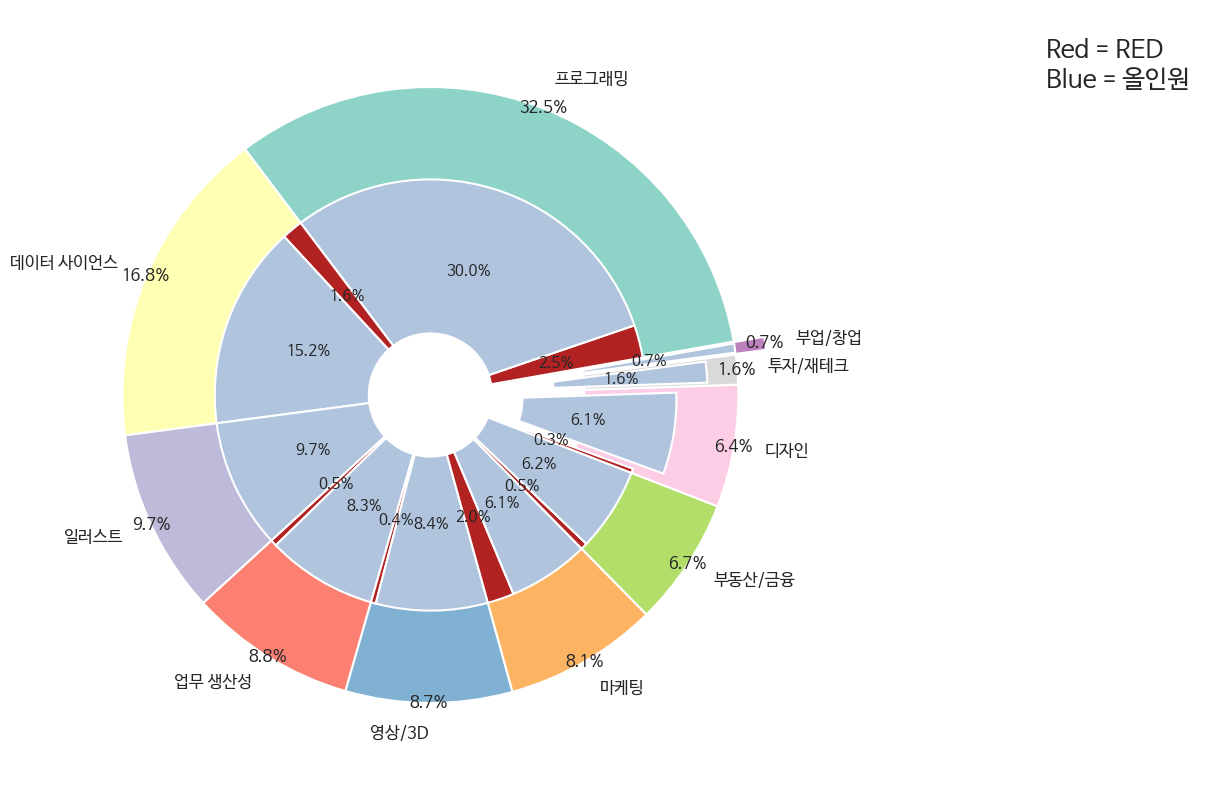

In [ ]:
#단과 카테고리 더블 도넛차트

ratio = final_df['카테고리'].value_counts().sort_values(ascending = False).values.flatten()
label = final_df['카테고리'].value_counts().sort_values(ascending = False).index
#더블 도넛 파이
plt.figure(figsize=(10, 10))
colors = plt.cm.Set3(range(len(label)))
colors_inner = ['firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'lightsteelblue','firebrick', 'lightsteelblue', 'firebrick',
                'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue', 'firebrick', 'lightsteelblue','lightsteelblue', 'lightsteelblue']

explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]
explode2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0.1, 0.2, 0.3]

#전체 강의 비율
plt.pie(ratio, labels= label, colors=colors, startangle=10,frame=True,radius=1,autopct='%1.1f%%',
        pctdistance=1.,textprops={'fontsize': 12},labeldistance=1.1,
        wedgeprops={'width': 0.5, 'edgecolor': 'white'},explode=explode)

#유형의 비율 (완강 / 환불)
plt.pie(type_df2['실거래금액'].values.flatten() ,colors=colors_inner,autopct='%1.1f%%',
        startangle=10, radius=.7, textprops={'fontsize': 11},labeldistance=10,
        wedgeprops={'width': 0.5, 'edgecolor': 'white'},explode=explode2) #width :파이크기 변경, explode 특정 파이조각을 띄우는 함수.

centre_circle = plt.Circle((0,0),.2,color='black', fc='white',linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.text(2, 1, "Red = RED \nBlue = 올인원 ", bbox=dict(facecolor='white', alpha=0.5))
plt.show()

### 쿠폰과 가격에 대해서 좀 생각 해보기

In [ ]:
#객체 선언
#모두 order로 되어 있어서 쿠폰과 판매가격 order를 나눔
coupon_order = ['쿠폰 없음', '5만원 이하', '5~10만원', '10~20만원', '20~30만원', '30~40만원','40만원 이상']

sale_price_order = ['10~20만원', '20~30만원', '30~40만원', '40~50만원', '50만원 이상']

<ipython-input-62-0631470f761e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


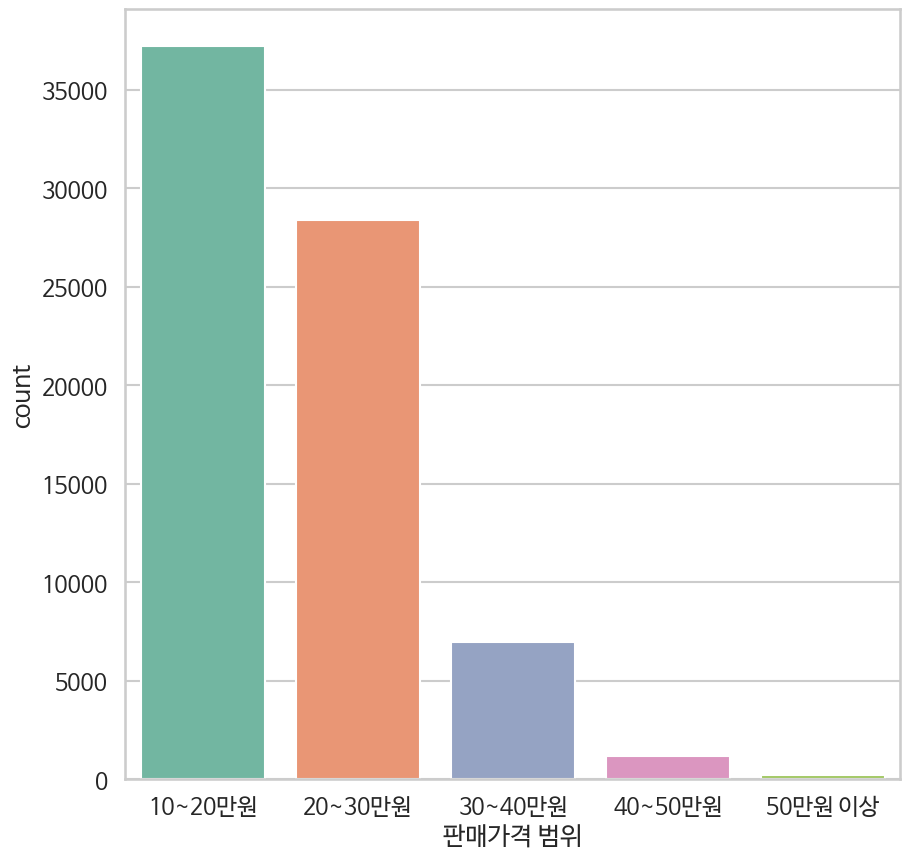

In [ ]:
plt.figure(figsize=(10, 10))
sns.despine()
#쿠폰을 사용한 행들만 데이터프레임으로 만듦
df_coupon = final_df[final_df["쿠폰이름"] != "No Data"]
df_coupon

#데이터프레임에 판매가격을 통해 새로운 판매가격 범위 열을 만듦
df_coupon.loc[df_coupon["판매가격"] < 100000, "판매가격 범위"] = "10만원 이하"
df_coupon.loc[(df_coupon["판매가격"] >= 100000) & (df_coupon["판매가격"] < 200000), "판매가격 범위"] = "10~20만원"
df_coupon.loc[(df_coupon["판매가격"] >= 200000) & (df_coupon["판매가격"] < 300000), "판매가격 범위"] = "20~30만원"
df_coupon.loc[(df_coupon["판매가격"] >= 300000) & (df_coupon["판매가격"] < 400000), "판매가격 범위"] = "30~40만원"
df_coupon.loc[(df_coupon["판매가격"] >= 400000) & (df_coupon["판매가격"] < 500000), "판매가격 범위"] = "40~50만원"
df_coupon.loc[(df_coupon["판매가격"] >= 500000) , "판매가격 범위"] = "50만원 이상"

#쿠폰이 사용된 데이터들에 판매가격 범위를 countplot 그래프로 그림
sns.countplot(data=df_coupon, x="판매가격 범위", order = sale_price_order)
plt.show()

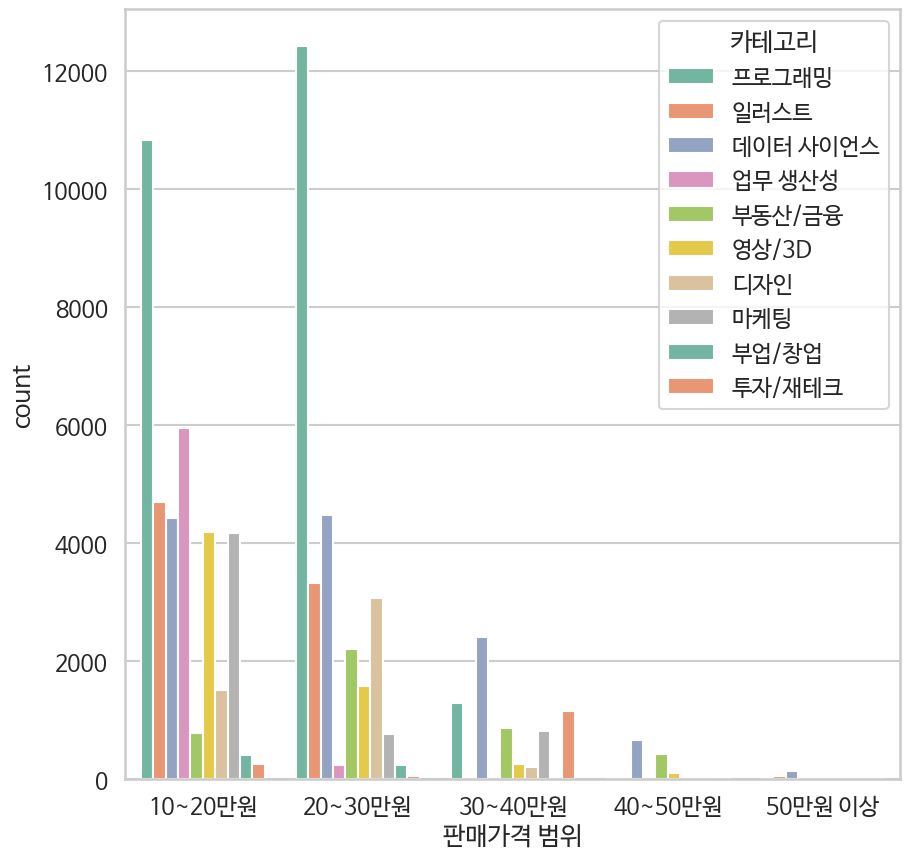

In [ ]:
#카테고리별 판매가격 그래프
plt.figure(figsize=(10, 10))

sns.countplot(data=df_coupon, x="판매가격 범위", order=sale_price_order, hue='카테고리', palette='Set2')
plt.show()


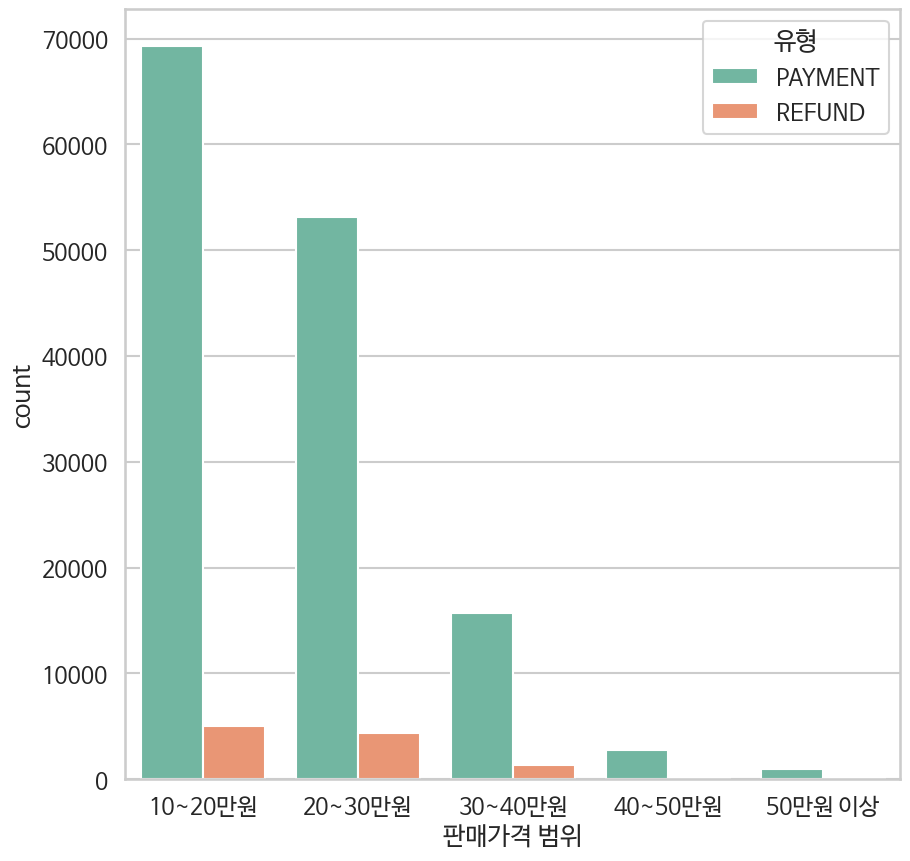

In [ ]:
## 판매가격 별 완강/환불율 그래프
plt.figure(figsize=(10, 10))
sns.despine()
#전체 데이터 프레임에서 판매가격을 통해 판매 가격 범위를 만듦
final_df.loc[final_df["판매가격"] < 100000, "판매가격 범위"] = "10만원 이하"
final_df.loc[(final_df["판매가격"] >= 100000) & (final_df["판매가격"] < 200000), "판매가격 범위"] = "10~20만원"
final_df.loc[(final_df["판매가격"] >= 200000) & (final_df["판매가격"] < 300000), "판매가격 범위"] = "20~30만원"
final_df.loc[(final_df["판매가격"] >= 300000) & (final_df["판매가격"] < 400000), "판매가격 범위"] = "30~40만원"
final_df.loc[(final_df["판매가격"] >= 400000) & (final_df["판매가격"] < 500000), "판매가격 범위"] = "40~50만원"
final_df.loc[(final_df["판매가격"] >= 500000) , "판매가격 범위"] = "50만원 이상"

#판매가격 범위를 hue를 통해 PAYMENT와 REFUND로 나눔
#데이터프레임을 판매가격 범위에 대해 countplot을 그림
sns.countplot(data=final_df, x="판매가격 범위", order=sale_price_order, hue="유형")
plt.show()

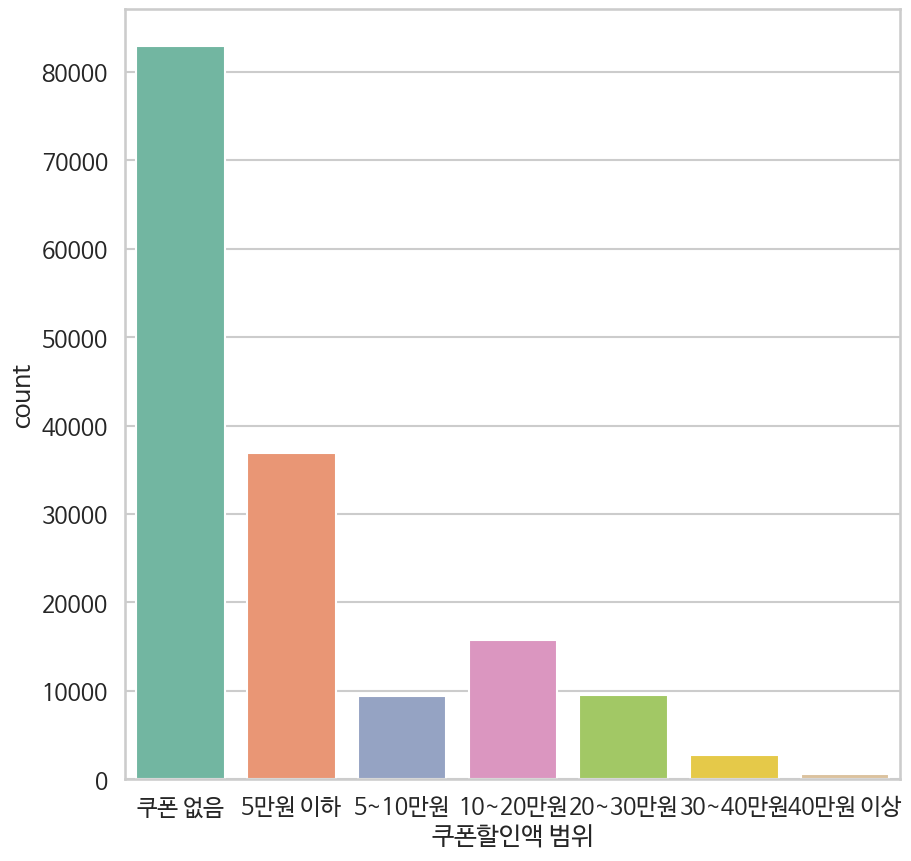

In [ ]:
plt.figure(figsize=(10, 10))
#쿠폰 할인액이 int 타입인 데이터프레임에 쿠폰할인액 범위 컬럼을 추가함

final_df["쿠폰할인액 범위"] = "쿠폰 없음"
final_df.loc[(final_df["쿠폰할인액"] >  0) & (final_df["쿠폰할인액"] < 50000), "쿠폰할인액 범위"] = "5만원 이하"
final_df.loc[(final_df["쿠폰할인액"] >= 50000) & (final_df["쿠폰할인액"] < 100000), "쿠폰할인액 범위"] = "5~10만원"
final_df.loc[(final_df["쿠폰할인액"] >= 100000) & (final_df["쿠폰할인액"] < 200000), "쿠폰할인액 범위"] = "10~20만원"
final_df.loc[(final_df["쿠폰할인액"] >= 200000) & (final_df["쿠폰할인액"] < 300000), "쿠폰할인액 범위"] = "20~30만원"
final_df.loc[(final_df["쿠폰할인액"] >= 300000) & (final_df["쿠폰할인액"] < 400000), "쿠폰할인액 범위"] = "30~40만원"
final_df.loc[(final_df["쿠폰할인액"] >= 400000) , "쿠폰할인액 범위"] = "40만원 이상"


#전체 데이터에서 쿠폰할인액 범위에 대한 countplot을 그림
sns.despine()
sns.countplot(data=final_df, x="쿠폰할인액 범위", order = coupon_order ) #상단에서 이미 객체 선언함.
plt.show()

